# Распознавание моделей одежды с помощью Keras
Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


Список с названиями классов

In [3]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Просматриваем примеры изображений

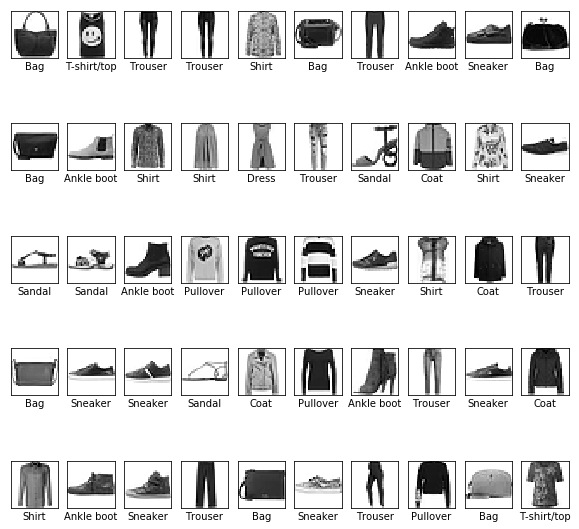

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train.reshape(60000, 784)

**Нормализация данных**

In [6]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 

**Работа с правильными ответами**

Просматриваем пример правильного ответа

In [7]:
print(y_train[0])

9


**Преобразуем метки в формат one hot encoding**

In [8]:
y_train = utils.to_categorical(y_train, 10)

**Правильный ответ в формате one hot encoding**

In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [10]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [12]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,  
                    verbose=1)

Epoch 1/100
60000/60000 [==============================] - 7s 112us/step - loss: 1.1272 - acc: 0.6676
Epoch 2/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.7256 - acc: 0.7741
Epoch 3/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.6356 - acc: 0.8018
Epoch 4/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.5869 - acc: 0.8125
Epoch 5/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.5554 - acc: 0.8193
Epoch 6/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.5327 - acc: 0.8254
Epoch 7/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.5156 - acc: 0.8288
Epoch 8/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.5014 - acc: 0.8327
Epoch 9/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.4898 - acc: 0.8365
Epoch 10/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.4800 - 

60000/60000 [==============================] - 5s 84us/step - loss: 0.3238 - acc: 0.8877
Epoch 81/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.3230 - acc: 0.8874
Epoch 82/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.3221 - acc: 0.8882
Epoch 83/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.3207 - acc: 0.8885
Epoch 84/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.3195 - acc: 0.8890
Epoch 85/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.3198 - acc: 0.8887
Epoch 86/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.3185 - acc: 0.8894
Epoch 87/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.3173 - acc: 0.8902
Epoch 88/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.3164 - acc: 0.8901
Epoch 89/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.3156 - acc: 

## Используем сеть для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [13]:
predictions = model.predict(x_train)

**Проверяем качество распознавания**

Просматриваем пример изображения

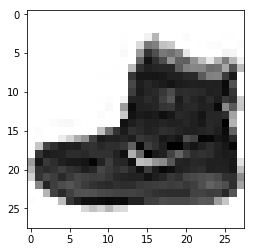

In [14]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Данные на выходе из сети в формате one-hot-encoding

In [15]:
print(predictions[n])

[5.4717715e-09 5.4459370e-10 4.7467252e-10 5.6978411e-10 4.5329779e-10
 1.2926542e-04 2.2259485e-08 5.5174920e-04 4.2754377e-06 9.9931467e-01]


Определяем номер класса изображения, который предлагает сеть

In [16]:
np.argmax(predictions[n])

9

Печатаем название класса

In [17]:
classes[np.argmax(predictions[n])]

'Ankle boot'

Печатаем номер класса правильного ответа

In [18]:
np.argmax(y_train[n])

9

Печатаем название класса правильного ответа

In [19]:
classes[np.argmax(y_train[n])]

'Ankle boot'